# TRAINING MODELS
*This is a notebook about ML models*

## SETUP

In [59]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter4_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [69]:
# Extra modules imported during the work
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import PolynomialFeatures

## LINEAR REGRESSION

### The Normal Equation 
*The direct “closed-form” equation*

Saving figure generated_data_plot


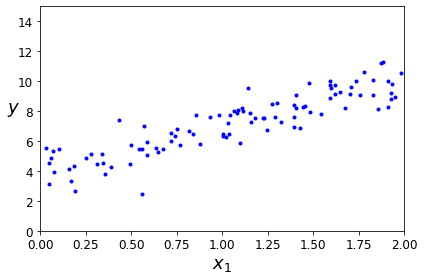

In [3]:
# Generate linear-looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [6]:
# Best fit directly using Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # parameter vector
theta_best

array([[3.86501051],
       [3.13916179]])

**Evaluate:** $\theta_{0}=4$ and $\theta_{1}=3$ but the noise makes it impossible to recover the exact parameters.

In [7]:
# Make prediction using the "trained" model
X_new = np.array([[0], [2]]) # Create two arbitrary records
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0=1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

Saving figure linear_model_predictions_plot


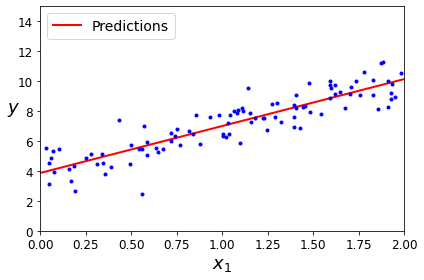

In [9]:
# Plot the model's predictions
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [11]:
# Sklearn implementation of linear regression - normal equation
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [13]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

**Remark:** `LinearRegression` class is based on the `scipy.linalg.lstsq()` function, which can be called directly.

In [14]:
# Directly call linalg.lstsq
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e6)
theta_best_svd

array([[3.86501051],
       [3.13916179]])

**Remark:** This function computes $X^{+}y$, where $X^{+}$ is the *pseudoinverse* of $X$ *(the Moore-Penrose inverse)* 

In [15]:
# Compute parameter vector through pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])

**Evaluate:** Normal Equation may not work if the matrix $X^{T}X$ is not singular but pseudoinverse is always defined.

**Remark:** The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition (SVD)*.
- The computational complexity of Normal Equation is $O(n^{3})$
- The computational complexity of SVD approach is $O(n^{2})$

=> Both get very slow when the number of features grows large (e.g., 100,000)

However, prediction using Normal Equation is fast since computattional complexity is linear.

### Gradient Descent
*The iterative approach*

#### Batch Gradient Descent
*Use the whole batch of training data at every step*

In [35]:
# Batch gradient descent
eta = 0.1 # learing rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization of theta value

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[3.86501051],
       [3.13916179]])

In [45]:
# Setup to plot the first 10 steps of Gradient Descent
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


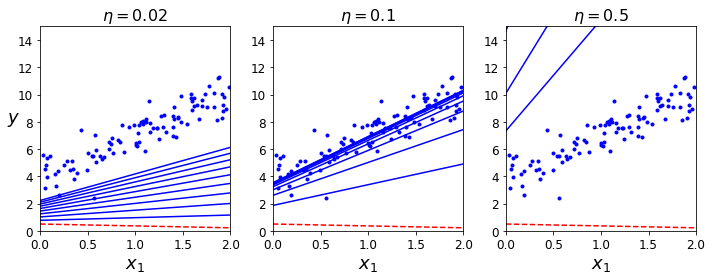

In [46]:
# Plot the first 10 steps of Gradient Descent with 3 different learing rates
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

**Evaluate:**
- LHS: Learning rate is too low, which makes the convergence be slow
- RHS: Learning rate is too high, which makes the algorithm diverge
- Mid: Good learning rate

#### Stochastic Gradient Descent
*Picks a random instance in the training set at every step*

In [22]:
# Stochastic Gradient Descent implemeted using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization of theta value

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[3.90997645],
       [3.12670312]])

Saving figure sgd_plot


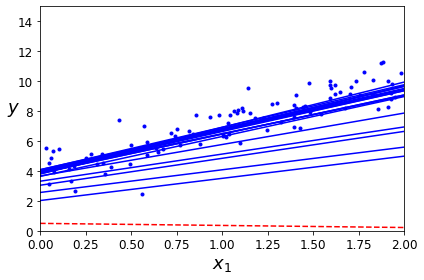

In [41]:
# Plot the first 20 steps of training
np.random.seed(42)
theta_path_sgd = []

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                 
plt.show()

In [42]:
# Sklearn implementation for SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86256592]), array([3.15101583]))

#### Mini-batch Gradient Descent
*Pick small random sets of instances called mini-batches*

In [48]:
# Mini-batch Gradient Descent using a simple learning schedule
theta_path_mgd = []

n_iterations = 50
t0, t1 = 200, 1000 # learning schedule hyperparameters
minibatch_size = 20

theta = np.random.randn(2,1)  # random initialization

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[3.87558894],
       [3.13893713]])

Saving figure gradient_descent_paths_plot


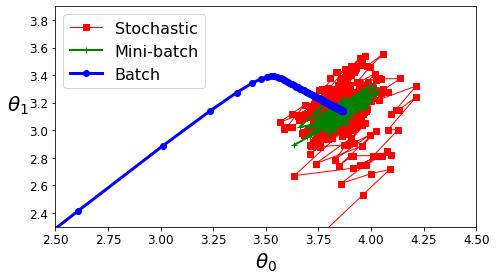

In [47]:
# Plot the Gradient Descents' paths in parameter space
np.random.seed(42)
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

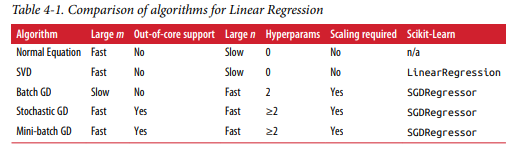

## Polynomial Regression

In [67]:
# Generate a simple quadratic equation
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


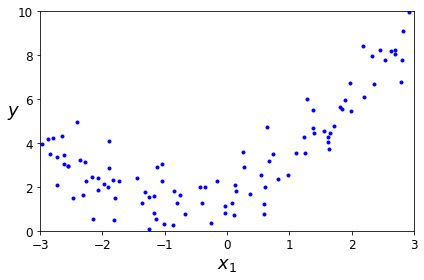

In [68]:
# Plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [70]:
# Sklearn implementation for 2nd-degree polynomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [71]:
X_poly[0]

array([-0.75275929,  0.56664654])

**Remark:** `X_poly` now contains the original feature of X plus the square of this feature, which means we can fit a `LinearRegression`.

In [72]:
# Polynomial regression as Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


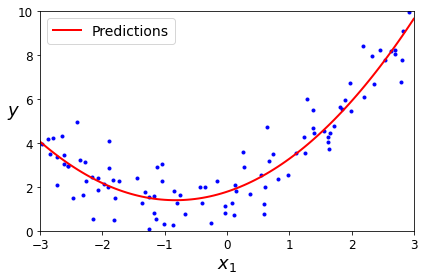

In [74]:
# Plot the 'linear' model
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

**Remark:** Beware the combinatorial explosion of the number of features!